# Pet Classification Challenge - Part 1/2
## Binary Classification - Binary Classification

## Downloand the Dataset + Amendments

Downloading Oxford-IIIT Pet Dataset from Kaggle and importing it into a virtual environment in Google Drive. "https://www.kaggle.com/datasets/tanlikesmath/the-oxfordiiit-pet-dataset/data"

In [1]:
import os
import zipfile
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Path to kaggle.json in MyDrive/Colab Notebooks
kaggle_json_path = "/content/drive/MyDrive/Colab Notebooks/kaggle.json"

# Step 2: Copy kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!cp "{kaggle_json_path}" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

# Step 3: Download the dataset from Kaggle
!kaggle datasets download -d tanlikesmath/the-oxfordiiit-pet-dataset -p /content

# Step 4: Extract the dataset with corrected structure
dataset_path = "/content/the-oxfordiiit-pet-dataset.zip"
extract_path = "/content/pet_dataset"
images_path = os.path.join(extract_path, "images")  # Ensure images go in the correct place

# Ensure the target folder exists
os.makedirs(images_path, exist_ok=True)

# Extract only necessary files, correcting structure
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        extracted_path = file_info.filename

        # Ignore directories, only extract files
        if not extracted_path.endswith('/'):
            # Remove any leading directory names (like "images/") to avoid nesting
            correct_name = os.path.basename(extracted_path)
            target_path = os.path.join(images_path, correct_name)

            # Extract file to the correct location
            with zip_ref.open(file_info.filename) as source, open(target_path, "wb") as target:
                target.write(source.read())

print(f"Dataset extracted to: {images_path}")


Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/tanlikesmath/the-oxfordiiit-pet-dataset
License(s): CC-BY-SA-4.0
 99% 1.46G/1.48G [00:10<00:00, 171MB/s]
100% 1.48G/1.48G [00:10<00:00, 152MB/s]
Dataset extracted to: /content/pet_dataset/images


In [4]:
# Check ZIP File strucrture
import zipfile
dataset_path = "/content/the-oxfordiiit-pet-dataset.zip"
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.printdir()

File Name                                             Modified             Size
images/Abyssinian_1.jpg                        2019-10-18 06:16:14        32362
images/Abyssinian_10.jpg                       2019-10-18 06:16:16        96294
images/Abyssinian_100.jpg                      2019-10-18 06:16:16       126923
images/Abyssinian_100.mat                      2019-10-18 06:16:16      1351002
images/Abyssinian_101.jpg                      2019-10-18 06:16:16        49023
images/Abyssinian_101.mat                      2019-10-18 06:16:16       956090
images/Abyssinian_102.jpg                      2019-10-18 06:16:18       165505
images/Abyssinian_102.mat                      2019-10-18 06:16:18      1611487
images/Abyssinian_103.jpg                      2019-10-18 06:16:18       132937
images/Abyssinian_104.jpg                      2019-10-18 06:16:18        34907
images/Abyssinian_105.jpg                      2019-10-18 06:16:20       141823
images/Abyssinian_106.jpg               

In [2]:
import os

# Specify the root directory (can be /content/pet_dataset/)
root_dir = '/content/pet_dataset/'

# Use os.walk to explore the directory structure
for root, dirs, files in os.walk(root_dir):
    # Show the full path of the directory
    print(f"Directory: {root}")
    # Show subdirectories
    print(f"Subdirectories: {dirs}")
    # Show files in that directory
    print(f"Files: {files}")
    # Show the total number of files in the current directory
    print(f"Total Number of files in {root}: {len(files)}")
    print("="*50)  # Separator for clarity

# If you want the total number of files in the entire root directory (including all subdirectories)
total_files = sum([len(files) for _, _, files in os.walk(root_dir)])
print(f"Total Number of files in {root_dir}: {total_files}")




Directory: /content/pet_dataset/
Subdirectories: ['images']
Files: []
Total Number of files in /content/pet_dataset/: 0
Directory: /content/pet_dataset/images
Subdirectories: []
Files: ['newfoundland_155.jpg', 'wheaten_terrier_139.jpg', 'miniature_pinscher_68.jpg', 'beagle_56.jpg', 'newfoundland_190.jpg', 'keeshond_177.jpg', 'miniature_pinscher_66.jpg', 'Abyssinian_56.jpg', 'chihuahua_45.jpg', 'english_setter_30.jpg', 'pug_139.jpg', 'basset_hound_134.jpg', 'english_setter_2.jpg', 'havanese_17.jpg', 'British_Shorthair_271.jpg', 'pomeranian_155.jpg', 'yorkshire_terrier_138.jpg', 'beagle_138.jpg', 'saint_bernard_129.jpg', 'shiba_inu_40.jpg', 'yorkshire_terrier_54.jpg', 'english_cocker_spaniel_100.jpg', 'Ragdoll_174.jpg', 'samoyed_145.jpg', 'samoyed_28.jpg', 'saint_bernard_68.jpg', 'staffordshire_bull_terrier_175.jpg', 'yorkshire_terrier_71.jpg', 'german_shorthaired_133.jpg', 'Abyssinian_45.jpg', 'Ragdoll_104.jpg', 'Maine_Coon_39.jpg', 'Ragdoll_63.jpg', 'British_Shorthair_272.jpg', 'staffo

In [6]:
# Check the content in the main dir
#!ls /content/pet_dataset


In [3]:
# Path to the directory
directory_path = '/content/pet_dataset/images'

# Get all files in the directory
files = os.listdir(directory_path)

# Loop through the files and check their extensions
file_extensions = set()  # Using a set to store unique extensions

for file in files:
    # Get the file extension
    _, extension = os.path.splitext(file)
    file_extensions.add(extension.lower())  # Normalize extension to lowercase

# Print the types of files (extensions)
print(f"Types of files in the directory: {file_extensions}")


Types of files in the directory: {'.jpg', '.mat'}


Split into train/validation for both dogs/cats sets

In [4]:
import os
import shutil
import random

# Path to the main images directory
base_dir = '/content/pet_dataset/images'
train_dir = '/content/pet_dataset/binary/train'
validation_dir = '/content/pet_dataset/binary/validation'

# Create the directories for train and validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Create subdirectories for dogs and cats
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

os.makedirs(train_dogs_dir, exist_ok=True)
os.makedirs(train_cats_dir, exist_ok=True)
os.makedirs(validation_dogs_dir, exist_ok=True)
os.makedirs(validation_cats_dir, exist_ok=True)

# List of all files in the main directory (only .jpg images)
image_files = [f for f in os.listdir(base_dir) if f.endswith('.jpg')]

# Function to determine if the image is a dog or a cat based on the file name
def is_dog(file_name):
    return file_name[0].islower()  # If the first letter is lowercase, it's a dog

# Shuffle the files for a random split
random.shuffle(image_files)

# Set the percentage of images to use for validation (30% validation, 70% training)
validation_split = 0.3
split_index = int(len(image_files) * (1 - validation_split))

# Split the files into training and validation
train_files = image_files[:split_index]
validation_files = image_files[split_index:]

# Function to copy the images into their respective directories
def copy_images(files, target_dir):
    for file in files:
        source = os.path.join(base_dir, file)
        if is_dog(file):  # If it's a dog
            destination = os.path.join(target_dir, 'dogs', file)
        else:  # If it's a cat
            destination = os.path.join(target_dir, 'cats', file)
        shutil.copy(source, destination)

# Copy the images into the training set and validation set
copy_images(train_files, train_dir)
copy_images(validation_files, validation_dir)

print(f'Success! The images have been split into {train_dir} and {validation_dir}.')


Success! The images have been split into /content/pet_dataset/binary/train and /content/pet_dataset/binary/validation.


In [5]:
import os

# Specify the root directory (can be /content/pet_dataset/)
root_dir = '/content/pet_dataset/'

# Use os.walk to explore the directory structure
for root, dirs, files in os.walk(root_dir):
    # Show the full path of the directory
    print(f"Directory: {root}")
    # Show subdirectories
    print(f"Subdirectories: {dirs}")
    # Show files in that directory
    print(f"Files: {files}")
    # Show the total number of files in the current directory
    print(f"Total Number of files in {root}: {len(files)}")
    print("="*50)  # Separator for clarity

# If you want the total number of files in the entire root directory (including all subdirectories)
total_files = sum([len(files) for _, _, files in os.walk(root_dir)])
print(f"Total Number of files in {root_dir}: {total_files}")

Directory: /content/pet_dataset/
Subdirectories: ['binary', 'images']
Files: []
Total Number of files in /content/pet_dataset/: 0
Directory: /content/pet_dataset/binary
Subdirectories: ['validation', 'train']
Files: []
Total Number of files in /content/pet_dataset/binary: 0
Directory: /content/pet_dataset/binary/validation
Subdirectories: ['cats', 'dogs']
Files: []
Total Number of files in /content/pet_dataset/binary/validation: 0
Directory: /content/pet_dataset/binary/validation/cats
Subdirectories: []
Files: ['Maine_Coon_39.jpg', 'British_Shorthair_272.jpg', 'Ragdoll_171.jpg', 'Bengal_174.jpg', 'Bombay_62.jpg', 'Russian_Blue_122.jpg', 'Birman_100.jpg', 'Russian_Blue_262.jpg', 'Persian_103.jpg', 'Sphynx_168.jpg', 'British_Shorthair_78.jpg', 'British_Shorthair_265.jpg', 'Siamese_188.jpg', 'Sphynx_173.jpg', 'Sphynx_237.jpg', 'Russian_Blue_242.jpg', 'Bengal_197.jpg', 'Siamese_206.jpg', 'Bombay_122.jpg', 'Maine_Coon_82.jpg', 'Egyptian_Mau_51.jpg', 'Ragdoll_137.jpg', 'Maine_Coon_143.jpg', 

I have observed that there is an imbalance between the number of dog and cat images, with the number of dog images being nearly twice that of the cat images. This imbalance could negatively affect the model's performance, particularly during training. To address this, it is advisable to implement data augmentation and adjust it by Class Weight Calculation, in order to increase the variance in the dataset.

Before doing that, let's see an example of a batch from the Database

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Display a random batch of 8 cat and 8 dog pictures

['Abyssinian_56.jpg', 'British_Shorthair_271.jpg', 'Ragdoll_174.jpg', 'Abyssinian_45.jpg', 'Ragdoll_104.jpg', 'Ragdoll_63.jpg', 'Russian_Blue_168.jpg', 'Russian_Blue_129.jpg', 'Sphynx_198.jpg', 'Bengal_134.jpg']
['american_bulldog_10.jpg', 'american_bulldog_103.jpg', 'american_bulldog_104.jpg', 'american_bulldog_105.jpg', 'american_bulldog_11.jpg', 'american_bulldog_110.jpg', 'american_bulldog_111.jpg', 'american_bulldog_113.jpg', 'american_bulldog_115.jpg', 'american_bulldog_116.jpg']


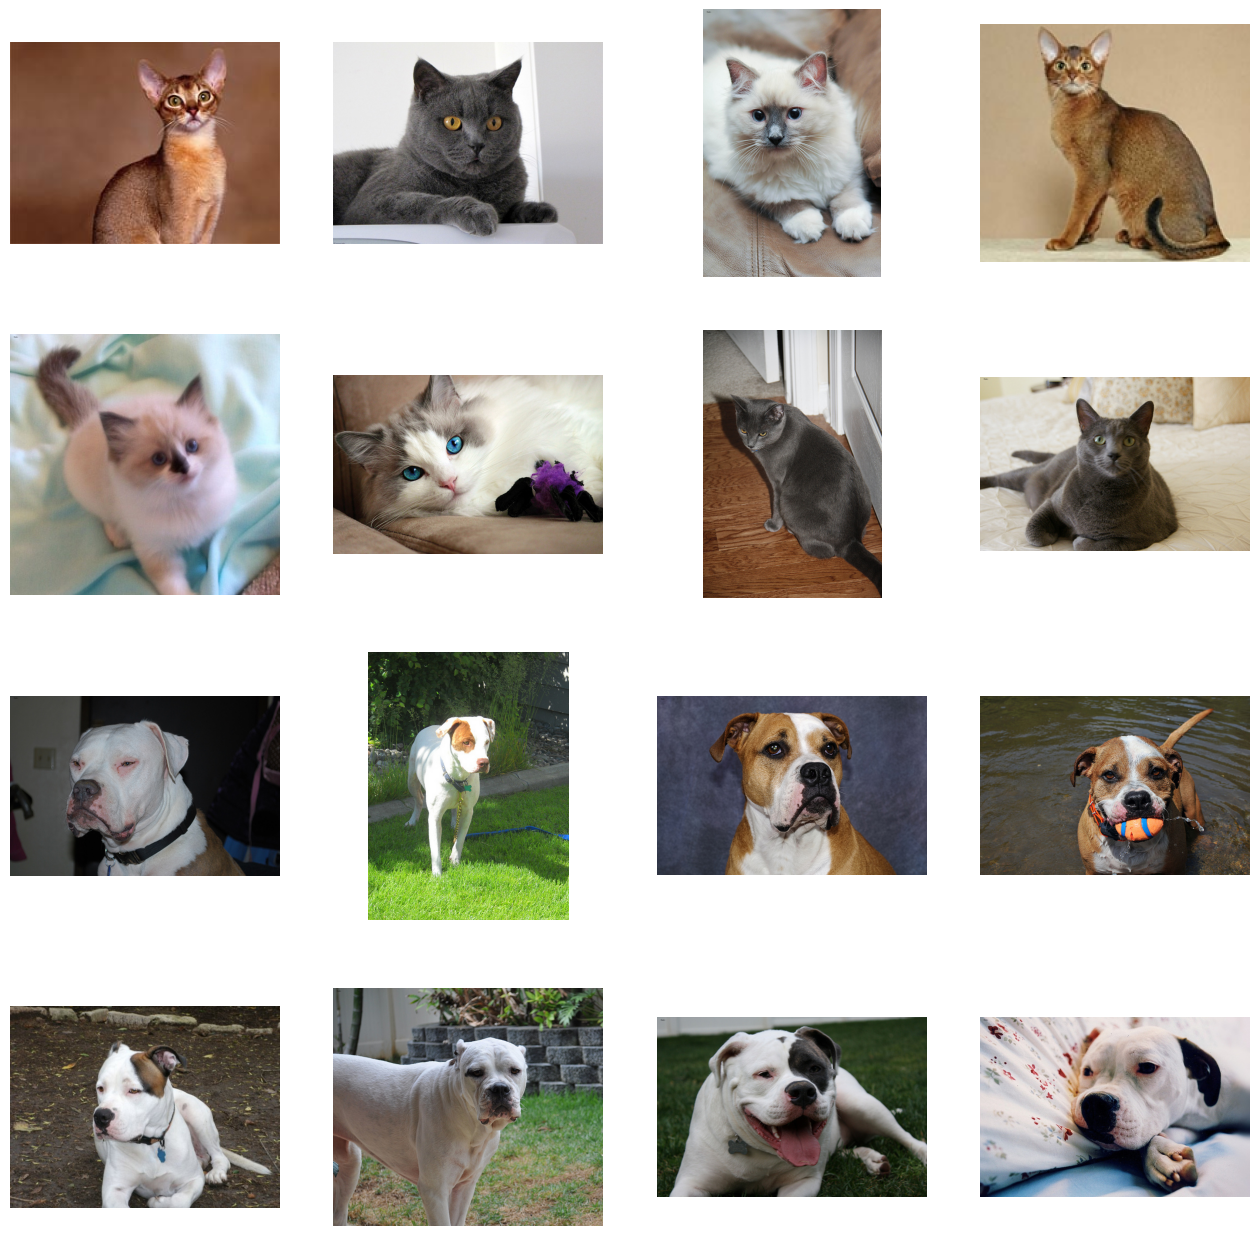

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Convnet Setting and Develompment
In the architecture, I will stack 3 modules, each one involves 3 layers:
A. Convolution -> operate on 3x3 windows
B. Relu
C. Maxpooling -> operate on 2x2 windows

The first convolution extracts 16 filters, the second one 32 filters, and the last one 64 filters.

The images to process should be 150x150 color images. It means they require a resize before feeding them into the neural network.

In [28]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [29]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

On top of it we stick two fully-connected layers. Because we are facing a two-class classification problem, we will end our network with a Sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [30]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully
# connected layer + sigmoid output layer
model = Model(img_input, output)

Let's summarize the model architecture:

In [31]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

The "output shape" column shows how the size of the feature map evolves in each successive layer.

With regards to the Model Training, we face a `binary_crossentropy` loss, where the final activation is a sigmoid.

I use the `rmsprop` optimizer with a learning rate of `0.001`, because RMSprop automates learning-rate tuning for us.
During training, we will want to monitor classification accuracy.

In [32]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

I process the images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range), using the `rescale` parameter.

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 5173 images belonging to 2 classes.
Found 2217 images belonging to 2 classes.


### Training
Let's train on all images available, for N epochs, and validate on the validation images.

In [34]:
history = model.fit(
      train_generator,
      steps_per_epoch=30,  # N images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=15,  # N images = batch_size * steps
      verbose=2)

Epoch 1/30
30/30 - 7s - 235ms/step - accuracy: 0.6350 - loss: 0.7511 - val_accuracy: 0.6900 - val_loss: 0.6247
Epoch 2/30
30/30 - 5s - 151ms/step - accuracy: 0.6100 - loss: 0.6535 - val_accuracy: 0.6633 - val_loss: 0.5854
Epoch 3/30
30/30 - 3s - 103ms/step - accuracy: 0.6883 - loss: 0.6199 - val_accuracy: 0.6767 - val_loss: 0.5977
Epoch 4/30
30/30 - 4s - 150ms/step - accuracy: 0.6600 - loss: 0.6093 - val_accuracy: 0.6667 - val_loss: 0.6132
Epoch 5/30
30/30 - 2s - 75ms/step - accuracy: 0.6883 - loss: 0.5852 - val_accuracy: 0.6900 - val_loss: 0.5554
Epoch 6/30
30/30 - 2s - 82ms/step - accuracy: 0.6783 - loss: 0.5746 - val_accuracy: 0.7067 - val_loss: 0.5749
Epoch 7/30
30/30 - 2s - 76ms/step - accuracy: 0.7000 - loss: 0.5590 - val_accuracy: 0.6900 - val_loss: 0.5913
Epoch 8/30
30/30 - 5s - 160ms/step - accuracy: 0.6981 - loss: 0.5574 - val_accuracy: 0.7067 - val_loss: 0.5276
Epoch 9/30
30/30 - 1s - 38ms/step - accuracy: 0.6816 - loss: 0.5772 - val_accuracy: 0.7033 - val_loss: 0.5171
Epoch

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

<Figure size 640x480 with 0 Axes>

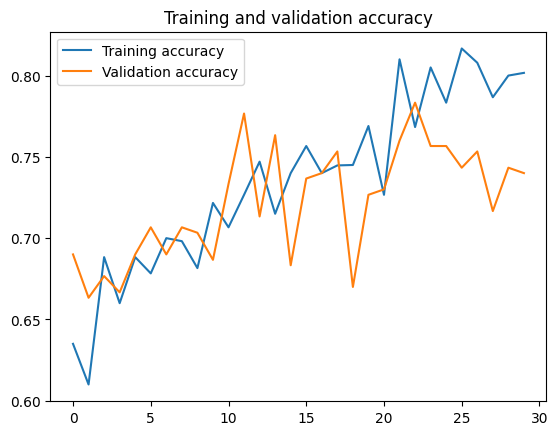

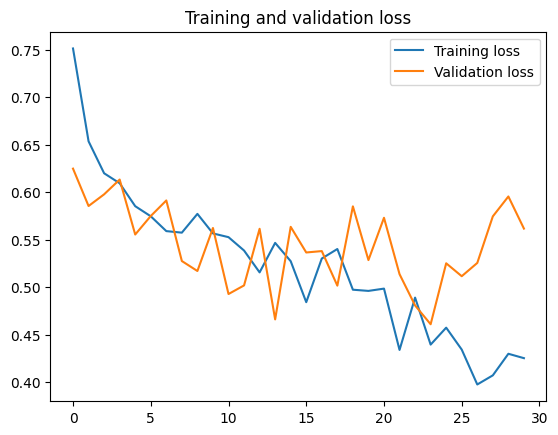

<Figure size 640x480 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

## Reducing Overfitting

### Data Augmentation

To maximize the use of our limited training examples, we will "augment" the dataset by applying various random transformations. This ensures that, during training, the model never sees the exact same image twice. Such augmentation helps prevent overfitting and improves the model's ability to generalize better.

This can be achieved by configuring multiple random transformations to be applied on the images read by our ImageDataGenerator instance.

Just an example of options available for image augmentation.
rotation_range: A value in degrees (0–180) that defines the range within which images can be randomly rotated.
width_shift and height_shift: Ranges (as fractions of the total width or height) within which images can be randomly shifted horizontally or vertically.
shear_range: Used for applying random shearing transformations to images.
zoom_range: Used for applying random zooming to the images.
horizontal_flip: Randomly flips half of the images horizontally. This is useful when there are no assumptions of horizontal asymmetry in the data (e.g., real-world images)

Now let's add our data-augmentation transformations to our data preprocessing configuration:

In [18]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 5173 images belonging to 2 classes.
Found 2217 images belonging to 2 classes.


### Adding Dropout + regularization L2

In [19]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(32, 3, activation='relu', kernel_regularizer=l2(0.001))(img_input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

# Configure and compile the model
model.compile(loss='binary_crossentropy',
              optimizer='Adam',  # Learning rate
              metrics=['accuracy'])

### Adding Class Weight
Be careful about the order as flow_from_directory() or image_dataset_from_directory() automatically assigns labels in alphabetical order based on the folder names.
It means before cats and then dogs.

In [17]:
# Total number of samples
total_samples = 4000 + 2000

# Number of classes
num_classes = 2

# Calculate correct class weights
class_weight_cats = total_samples / (num_classes * 2000)  # Cats = label 0
class_weight_dogs = total_samples / (num_classes * 4000)  # Dogs = label 1

# Correct mapping
class_weights = {0: class_weight_cats, 1: class_weight_dogs}

# Print class weights
print(f"Class Weight for Cats (0): {class_weight_cats}")
print(f"Class Weight for Dogs (1): {class_weight_dogs}")
print(f"Class Weights: {class_weights}")


Class Weight for Cats (0): 1.5
Class Weight for Dogs (1): 0.75
Class Weights: {0: 1.5, 1: 0.75}


In [23]:
print("Train class indices:", train_generator.class_indices)
print("Validation class indices:", validation_generator.class_indices)


Train class indices: {'cats': 0, 'dogs': 1}
Validation class indices: {'cats': 0, 'dogs': 1}


In [20]:
# Batch Example
import numpy as np

for data_batch, labels_batch in train_generator:
    print('Shape del data batch:', data_batch.shape)
    print('Shape del label batch:', labels_batch.shape)
    print('Primo label batch:', labels_batch)
    break

import matplotlib.pyplot as plt

label_map = {v: k for k, v in train_generator.class_indices.items()}
num_to_show = data_batch.shape[0]
for i in range(num_to_show):
    image = data_batch[i]
    label = label_map[labels_batch[i]]
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Retrain the Model

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.00001)

# fitting

history = model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=15,
    verbose=2,
    class_weight=class_weights,  # Apply class weights here
    callbacks=[reduce_lr]
)


Epoch 1/30
30/30 - 7s - 231ms/step - accuracy: 0.6050 - loss: 1.9689 - val_accuracy: 0.3300 - val_loss: 3.3986 - learning_rate: 2.0000e-04
Epoch 2/30
30/30 - 10s - 344ms/step - accuracy: 0.6500 - loss: 1.9262 - val_accuracy: 0.3667 - val_loss: 2.5850 - learning_rate: 2.0000e-04
Epoch 3/30
30/30 - 5s - 180ms/step - accuracy: 0.6633 - loss: 1.9162 - val_accuracy: 0.3667 - val_loss: 2.3825 - learning_rate: 2.0000e-04
Epoch 4/30
30/30 - 6s - 190ms/step - accuracy: 0.6533 - loss: 1.8718 - val_accuracy: 0.4433 - val_loss: 2.0667 - learning_rate: 2.0000e-04
Epoch 5/30
30/30 - 6s - 190ms/step - accuracy: 0.6083 - loss: 1.8707 - val_accuracy: 0.4533 - val_loss: 2.0694 - learning_rate: 2.0000e-04
Epoch 6/30
30/30 - 5s - 170ms/step - accuracy: 0.6367 - loss: 1.8698 - val_accuracy: 0.4933 - val_loss: 2.0416 - learning_rate: 2.0000e-04
Epoch 7/30
30/30 - 6s - 212ms/step - accuracy: 0.6543 - loss: 1.8432 - val_accuracy: 0.5533 - val_loss: 1.9478 - learning_rate: 2.0000e-04
Epoch 8/30
30/30 - 10s - 3

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

<Figure size 640x480 with 0 Axes>

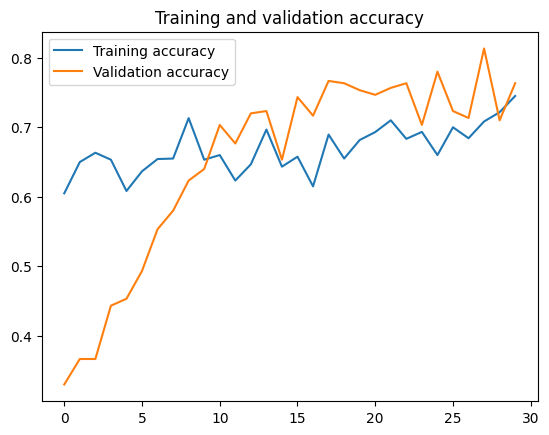

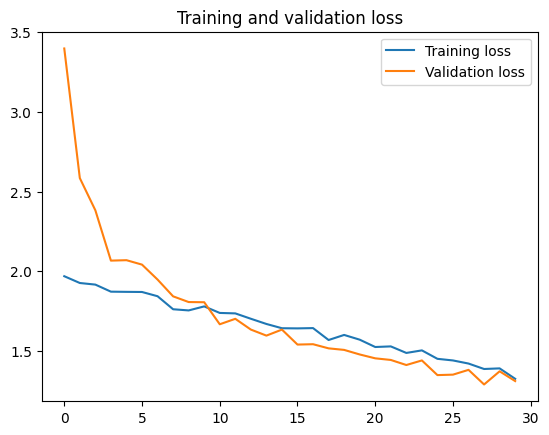

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

# Pet Classification Challenge - part 2/2
## MultiClass Classification

`one-hot encode` the labels (each class will be represented as a vector with a 1 at the index of the class and 0s elsewhere).

In [4]:
import os
import shutil
import random

# Path to the main images directory
base_dir = '/content/pet_dataset/images'
train_dir = '/content/pet_dataset/multiclass/train'
validation_dir = '/content/pet_dataset/multiclass/validation'

# Create the directories for train and validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# List of all files in the main directory (only .jpg images)
image_files = [f for f in os.listdir(base_dir) if f.endswith('.jpg')]

# Function to extract breed name from file name
def get_breed(file_name):
    return '_'.join(file_name.split('_')[:-1])  # Remove the last part (number)

# Get unique breed names
breeds = sorted(set(get_breed(f) for f in image_files))

# Create subdirectories for each breed
for breed in breeds:
    os.makedirs(os.path.join(train_dir, breed), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, breed), exist_ok=True)

# Shuffle the files for a random split
random.shuffle(image_files)

# Set the percentage of images to use for validation (30% validation, 70% training)
validation_split = 0.3
split_index = int(len(image_files) * (1 - validation_split))

# Split the files into training and validation
train_files = image_files[:split_index]
validation_files = image_files[split_index:]

# Function to copy the images into their respective directories
def copy_images(files, target_dir):
    for file in files:
        source = os.path.join(base_dir, file)
        breed = get_breed(file)  # Extract breed name
        destination = os.path.join(target_dir, breed, file)
        shutil.copy(source, destination)

# Copy the images into the training set and validation set
copy_images(train_files, train_dir)
copy_images(validation_files, validation_dir)

print(f'Success! The images have been split into {train_dir} and {validation_dir} with 37 breed categories.')


Success! The images have been split into /content/pet_dataset/multiclass/train and /content/pet_dataset/multiclass/validation with 37 breed categories.


In [5]:
import os

# Specify the root directory (can be /content/pet_dataset/)
root_dir = '/content/pet_dataset/'

# Use os.walk to explore the directory structure
for root, dirs, files in os.walk(root_dir):
    # Show the full path of the directory
    print(f"Directory: {root}")
    # Show subdirectories
    print(f"Subdirectories: {dirs}")
    # Show files in that directory
    print(f"Files: {files}")
    # Show the total number of files in the current directory
    print(f"Total Number of files in {root}: {len(files)}")
    print("="*50)  # Separator for clarity

# If you want the total number of files in the entire root directory (including all subdirectories)
total_files = sum([len(files) for _, _, files in os.walk(root_dir)])
print(f"Total Number of files in {root_dir}: {total_files}")


Directory: /content/pet_dataset/
Subdirectories: ['multiclass', 'images']
Files: []
Total Number of files in /content/pet_dataset/: 0
Directory: /content/pet_dataset/multiclass
Subdirectories: ['validation', 'train']
Files: []
Total Number of files in /content/pet_dataset/multiclass: 0
Directory: /content/pet_dataset/multiclass/validation
Subdirectories: ['Sphynx', 'basset_hound', 'Ragdoll', 'boxer', 'keeshond', 'Russian_Blue', 'saint_bernard', 'newfoundland', 'samoyed', 'beagle', 'chihuahua', 'staffordshire_bull_terrier', 'english_cocker_spaniel', 'english_setter', 'Bombay', 'Abyssinian', 'havanese', 'pug', 'Birman', 'german_shorthaired', 'miniature_pinscher', 'great_pyrenees', 'pomeranian', 'american_pit_bull_terrier', 'american_bulldog', 'yorkshire_terrier', 'wheaten_terrier', 'Egyptian_Mau', 'British_Shorthair', 'scottish_terrier', 'Persian', 'Maine_Coon', 'leonberger', 'japanese_chin', 'Bengal', 'Siamese', 'shiba_inu']
Files: []
Total Number of files in /content/pet_dataset/multic

## Main differences

For multiclass classification, the output layer needs to have one neuron per class (37 neurons) and should use the `softmax activation function`. This will give the model a probability distribution over the classes.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(37, activation='softmax')  # 37 classes, softmax activation
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The Sequential model from Keras means no need to explicitly call Model to configure and compile. The Sequential API is designed to stack layers in a linear fashion, and the model configuration and compilation are done directly within it.

Be aware to consider `categorical_crossentropy` in place of `binary_crossentropy` as the loss function.

In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical crossentropy for multiclass classification
    metrics=['categorical_accuracy']  # Use categorical accuracy to measure performance
)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # The directory where the training images are located
    target_size=(150, 150),  # Resize the images to (150, 150)
    batch_size=20,
    class_mode='categorical'  # Use categorical labels (one-hot encoded)
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,  # The directory where the validation images are located
    target_size=(150, 150),  # Resize the images to (150, 150)
    batch_size=20,
    class_mode='categorical'  # Use categorical labels (one-hot encoded)
)



Found 5173 images belonging to 37 classes.
Found 2217 images belonging to 37 classes.


In [9]:
print("Train class indices:", train_generator.class_indices)
print("Validation class indices:", validation_generator.class_indices)

Train class indices: {'Abyssinian': 0, 'Bengal': 1, 'Birman': 2, 'Bombay': 3, 'British_Shorthair': 4, 'Egyptian_Mau': 5, 'Maine_Coon': 6, 'Persian': 7, 'Ragdoll': 8, 'Russian_Blue': 9, 'Siamese': 10, 'Sphynx': 11, 'american_bulldog': 12, 'american_pit_bull_terrier': 13, 'basset_hound': 14, 'beagle': 15, 'boxer': 16, 'chihuahua': 17, 'english_cocker_spaniel': 18, 'english_setter': 19, 'german_shorthaired': 20, 'great_pyrenees': 21, 'havanese': 22, 'japanese_chin': 23, 'keeshond': 24, 'leonberger': 25, 'miniature_pinscher': 26, 'newfoundland': 27, 'pomeranian': 28, 'pug': 29, 'saint_bernard': 30, 'samoyed': 31, 'scottish_terrier': 32, 'shiba_inu': 33, 'staffordshire_bull_terrier': 34, 'wheaten_terrier': 35, 'yorkshire_terrier': 36}
Validation class indices: {'Abyssinian': 0, 'Bengal': 1, 'Birman': 2, 'Bombay': 3, 'British_Shorthair': 4, 'Egyptian_Mau': 5, 'Maine_Coon': 6, 'Persian': 7, 'Ragdoll': 8, 'Russian_Blue': 9, 'Siamese': 10, 'Sphynx': 11, 'american_bulldog': 12, 'american_pit_bul

## Model Training

Due to the low number of images per breed (small dataset),it's possible don't have
enough data batches to complete the expected number of steps per epoch. Let model.fit() automatically determine the steps per epoch.

In [26]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - categorical_accuracy: 0.0421 - loss: 3.6719 - val_categorical_accuracy: 0.0753 - val_loss: 3.4253
Epoch 2/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - categorical_accuracy: 0.1260 - loss: 3.2251 - val_categorical_accuracy: 0.1177 - val_loss: 3.2515
Epoch 3/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - categorical_accuracy: 0.3500 - loss: 2.3444 - val_categorical_accuracy: 0.1335 - val_loss: 3.6358
Epoch 4/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - categorical_accuracy: 0.7370 - loss: 0.9815 - val_categorical_accuracy: 0.1227 - val_loss: 5.6311
Epoch 5/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - categorical_accuracy: 0.9362 - loss: 0.2625 - val_categorical_accuracy: 0.1457 - val_loss: 7.8155


### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation `accuracy` and `categorical_accuracy` collected during training:



<Figure size 640x480 with 0 Axes>

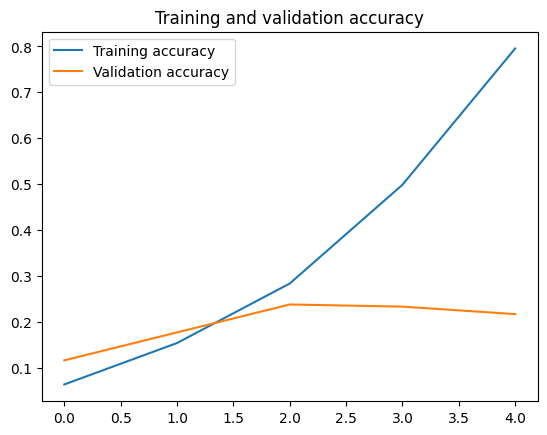

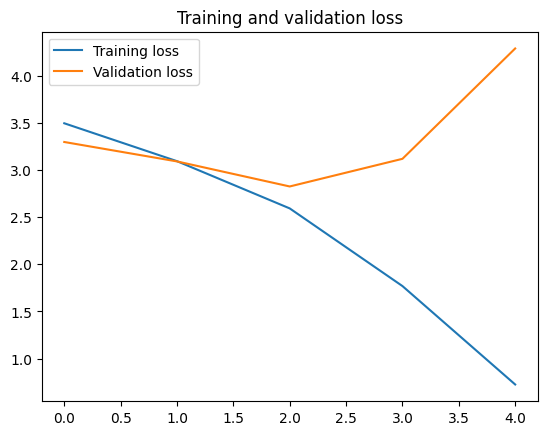

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

## Improvements

Adding Data Augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Rotate images randomly up to 30 degrees
    width_shift_range=0.2,  # Translate horizontally by up to 20% of the width
    height_shift_range=0.2,  # Translate vertically by up to 20% of the height
    shear_range=0.2,  # Apply shearing transformations
    zoom_range=0.2,  # Apply random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels
)

# Validation data should NOT be augmented, only rescaled
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

print("Data generators created with augmentation for training.")

# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator


Found 5173 images belonging to 37 classes.
Found 2217 images belonging to 37 classes.
Data generators created with augmentation for training.


Adding Dropout, L2 regularization, Batch Normalization

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(37, activation='softmax')  # 37 classes
])

# Configure and compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

# Callback to reduce learning rate if validation loss does not improve
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

print("Model compiled with L2 regularization, Batch Normalization, and ReduceLROnPlateau.")


Model compiled with L2 regularization, Batch Normalization, and ReduceLROnPlateau.


Train the Model

In [12]:
# fitting
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[reduce_lr]
)




/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 63s 208ms/step - categorical_accuracy: 0.0303 - loss: 13.6112 - val_categorical_accuracy: 0.0347 - val_loss: 5.7687 - learning_rate: 0.0010
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 69s 179ms/step - categorical_accuracy: 0.0316 - loss: 5.3915 - val_categorical_accuracy: 0.0289 - val_loss: 5.0783 - learning_rate: 0.0010
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 83s 182ms/step - categorical_accuracy: 0.0313 - loss: 5.0112 - val_categorical_accuracy: 0.0212 - val_loss: 4.8593 - learning_rate: 0.0010
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 81s 178ms/step - categorical_accuracy: 0.0324 - loss: 4.6438 - val_categorical_accuracy: 0.0212 - val_loss: 4.3968 - learning_rate: 0.0010
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 83s 182ms/step - categorical_accuracy: 0.0313 - loss: 4.3639 - val_categorical_accuracy: 0.0284 - val_loss: 4.4619 - learning_rate: 0.0010
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 51s 195ms/step - categorical_accuracy: 0.0311 - loss: 4.3188 - v

Performance Evaluation

<Figure size 640x480 with 0 Axes>

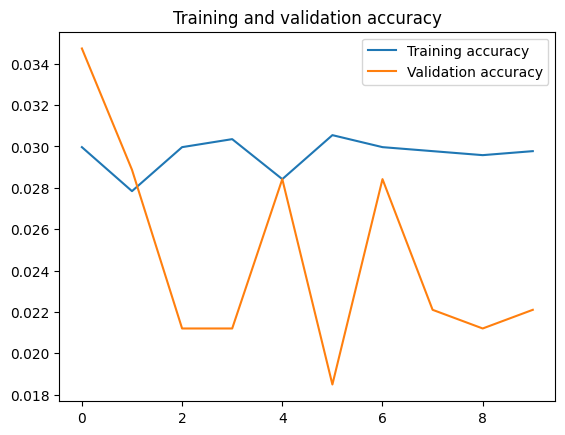

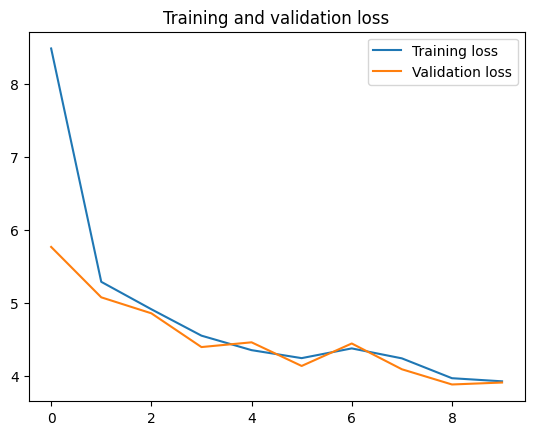

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()